In [1]:
from ase.io import read, write
from ase import Atoms
import pickle
from ocdata.core import Adsorbate, Slab, Bulk, AdsorbateSlabConfig
import os
import json
from ocdata.databases.pkls import BULK_PKL
import gzip
import matplotlib.pyplot as plt
import re

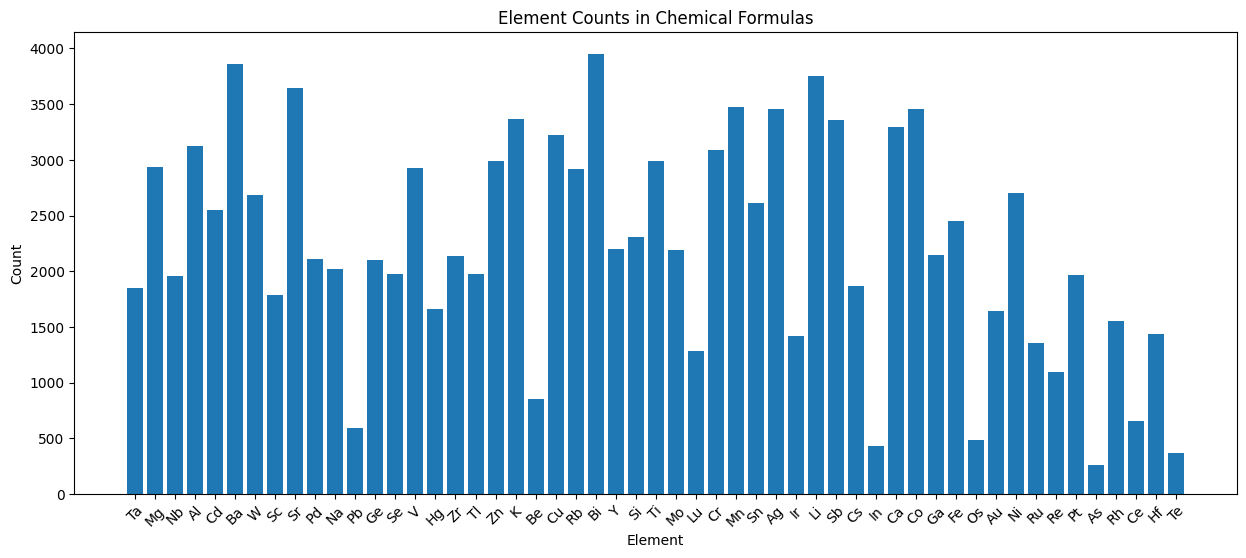

In [2]:
with open(BULK_PKL, 'rb') as f:
    all_bulks_ocdata = pickle.load(file=f)

with open('oc22_metadata.pkl', 'rb') as f:
    oc22_data = pickle.load(file=f)

list_of_mp_ids_oxides = list()
for keys, values in oc22_data.items():
     if re.search(r'O\d*$', values["bulk_symbols"]):
        list_of_mp_ids_oxides.append(values['bulk_id'])

def extract_elements(formula):
    elements = re.findall(r'[A-Z][a-z]*', formula)
    return elements

element_counts = {}
for key, info in oc22_data.items():
    elements = extract_elements(info["bulk_symbols"])
    for element in elements:
        if element in element_counts:
            element_counts[element] += 1
        else:
            element_counts[element] = 1
del element_counts["O"]
# Create a bar chart
elements = list(element_counts.keys())
counts = list(element_counts.values())

plt.figure(figsize=(15, 6))
plt.bar(elements, counts, )
plt.xlabel("Element")
plt.ylabel("Count")
plt.title("Element Counts in Chemical Formulas")
plt.xticks(rotation=45)
plt.show()

In [22]:
"R" in all_bulks[0].get('atoms').get_chemical_formula()
oxide_bulks = list()
for bulk in all_bulks:
    if 6 in bulk.get('atoms').numbers:
        oxide_bulks.append(bulk)

In [12]:
import os
from ase.io import read, write
from ase.atoms import Atoms


class BestSurfaces():
    def __init__(self, path_to_slabs, material_id):
        self.path_to_slabs = path_to_slabs
        self.material_id = material_id
        self.slab_files = self.list_files_of_relaxed_slabs()
        self.unique_millers = self.get_millers()
        self.slabs_info_dict = self.sort_slabs_based_on_millers()
        self.slabs_info_dict = self.get_energies_and_best_surfaces()
        pass

    def list_files_of_relaxed_slabs(self):
        slab_files = [file for file in os.listdir(self.path_to_slabs) if self.material_id in file and file.endswith('.traj')]
        return slab_files

    def get_millers(self):
        all_millers = list()
        for slabfile in self.slab_files:
            miller_string = slabfile.split('_')[2]
            all_millers.append(miller_string)
        
        return list(set(all_millers))

    def sort_slabs_based_on_millers(self):
        slabs_info_dict = dict()
        for miller in self.unique_millers:
            slabs_info_dict[miller] = dict()
            filtered_list = list()
            for slab_file in self.slab_files:
                if miller in slab_file:
                    filtered_list.append(slab_file)
            slabs_info_dict[miller]['slabfiles'] = filtered_list
        return slabs_info_dict

    def get_energies_and_best_surfaces(self):
        with open(os.path.join(self.path_to_slabs, 'best_surfaces.txt'), 'w') as f:
            for miller, info in self.slabs_info_dict.items():
                total_energies = list()
                energy_per_atom = list()
                for slabfile in info['slabfiles']:
                    filepath = os.path.join(self.path_to_slabs, slabfile)
                    atoms_obj = read(filepath)
                    toten = atoms_obj.get_potential_energy()
                    natoms = atoms_obj.get_global_number_of_atoms()
                    e_per_atom = toten/natoms
                    total_energies.append(toten)
                    energy_per_atom.append(e_per_atom)
                info['total_energies'] = total_energies
                info['energy_per_atom'] = energy_per_atom
                min_energy = min(energy_per_atom)
                info['min_energy'] = min_energy
                min_energy_surface = info['slabfiles'][energy_per_atom.index(min_energy)]
                print(min_energy_surface, min_energy, file=f)
                info['min_energy_surface'] = min_energy_surface
        return self.slabs_info_dict
    
    def save_best_surface_images(self):
        path_to_images = os.path.join(self.path_to_slabs, 'images')
        if not os.path.exists(path_to_images):
            os.makedirs(path_to_images)
        for miller, info in self.slabs_info_dict.items():
            best_surface = read(os.path.join(self.path_to_slabs, info['min_energy_surface']))
            write(os.path.join(path_to_images, info['min_energy_surface'].split('.')[0] + '.png'), best_surface, rotation='10z,-80x')

    

In [2]:
precom_slab_pkl = "/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_ads_OCP/slabs.pkl"
bulk_path = "/scratch/project_2005750/bulks_opt/oxides_rpbe/ZnO_mp-2133"
bulk = read(os.path.join(bulk_path, 'vasprun.xml.relax2.gz'), format='vasp-xml')
bulk_obj = Bulk(bulk_atoms=bulk)
#slabs = Slab.from_bulk_get_all_slabs(bulk_obj)

In [6]:
precom_slab_pkl= "scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_OCP22/slab.pkl"

precom_slabs = Slab(precom).from_precomputed_slabs_pkl(bulk=bulk, precomputed_slabs_pkl=precom_slab_pkl)

AssertionError: 

In [26]:
best_surface_list = [surface.replace('traj', 'json') for surface in _best_surface_list]

In [27]:
full_list = dict()
for slab in slab_from_pkl:
    name = ocp_inputs._name_for_slab(slab=slab, adslab_num=None, adsorbate_suffix=None)
    full_list[name] = slab

In [30]:
adsorbate_info = ocp_inputs.update_adsorbates_info()

best_slabs_dict = dict()
for slab in best_surface_list:
    best_slabs_dict[slab] = full_list[slab]

In [31]:
adsorbate_info

{'d_H': {'suffix': '-H',
  'binding_index': [0],
  'atoms_obj': Atoms(symbols='H', pbc=True, cell=[20.0, 20.0, 20.0], calculator=SinglePointDFTCalculator(...)),
  'ocp_adsorbate': Adsorbate: (H)},
 'd_OH': {'suffix': '-OH',
  'binding_index': [0],
  'atoms_obj': Atoms(symbols='OH', pbc=True, cell=[20.0, 20.0, 20.0], calculator=SinglePointDFTCalculator(...)),
  'ocp_adsorbate': Adsorbate: (HO)},
 'm_CO': {'suffix': '-CO',
  'binding_index': [0],
  'atoms_obj': Atoms(symbols='CO', pbc=True, cell=[20.0, 20.0, 20.0], calculator=SinglePointDFTCalculator(...)),
  'ocp_adsorbate': Adsorbate: (CO)},
 'd_OCH3': {'suffix': '-OCH3',
  'binding_index': [4],
  'atoms_obj': Atoms(symbols='CH3O', pbc=True, cell=[20.0, 20.0, 20.0], calculator=SinglePointDFTCalculator(...)),
  'ocp_adsorbate': Adsorbate: (CH3O)},
 'd_OCHO': {'suffix': '-OCHO',
  'binding_index': [1],
  'atoms_obj': Atoms(symbols='CO2H', pbc=True, cell=[20.0, 20.0, 20.0], calculator=SinglePointDFTCalculator(...)),
  'ocp_adsorbate': Ads

In [33]:
for slabname, slab in best_slabs_dict.items():
     for adsorbate_id, adsorbate in adsorbate_info.items():
        adslabs = AdsorbateSlabConfig(slab=slab, adsorbate=adsorbate['ocp_adsorbate'], mode='heuristic')
        for adslab_num, adslab in enumerate(adslabs.atoms_list):
                    save_filepath = os.path.join(save_path, 
                                                 ocp_inputs._name_for_slab(slab,
                                                                       adslab_num, 
                                                                       adsorbate['suffix']))
                    write(save_filepath, adslab, format='json') 

In [1]:
from input_gen import OCPInputGenerator

adsorbates_path = "/scratch/project_2005750/adsorbants/ocp_ecut_450"
bulk_path = "/scratch/project_2005750/bulks_opt/ZnO/"
save_path = "/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_ads_OCP/adslabs"
best_slabs_csv = "/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_ads_OCP/slabs/best_surfaces.txt"
precom_slab_pkl = "/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_ads_OCP/slabs.pkl"
ocp_inputs = OCPInputGenerator(adsorbates_path=adsorbates_path,
                              bulk_path=bulk_path,
                              is_metal=False, 
                              bulk_material_id='ZnO_mp-2133',
                              save_path=save_path)

all_adslabs = ocp_inputs.create_specific_adslabs(path_to_best_slabs_csv=best_slabs_csv, precom_slab_pkl=precom_slab_pkl)

In [6]:
import pickle
adslab_pkl_path = "/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_ads_OCP/adslabs.pkl"
with open(adslab_pkl_path, 'wb') as f:
    pickle.dump(all_adslabs, f)

In [1]:
from input_gen import OCPInputGenerator

adsorbates_path = "/scratch/project_2005750/adsorbants/ocp_ecut_450"
bulk_path = "/scratch/project_2005750/bulks_opt/oxides_rpbe/ZnO_mp-2133"
save_path = "/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_OCP22"

ocp_inputs = OCPInputGenerator(adsorbates_path=adsorbates_path,
                              bulk_path=bulk_path,
                              is_metal=False, 
                              bulk_material_id='ZnO_mp-2133',
                              save_path=save_path)


In [5]:
ocp_inputs.ocp_bulk.atoms.get_positions()

array([[ 1.66302007e+00,  9.60142997e-01,  2.68573441e+00],
       [-1.31968473e-06,  1.92028887e+00,  3.17614898e-03],
       [ 1.66302007e+00,  9.60142997e-01,  4.71978957e+00],
       [-1.31968473e-06,  1.92028887e+00,  2.03723131e+00]])

In [8]:
slabs_test = Slab.from_bulk_get_all_slabs(bulk=ocp_inputs.ocp_bulk)

In [9]:
slabs_test

[Slab: (O48Zn48, (1, 1, 1), 0.09507749999999993, True),
 Slab: (O48Zn48, (1, 1, 1), 0.22007749999999981, True),
 Slab: (O48Zn48, (1, 1, 1), 0.09507749999999993, False),
 Slab: (O48Zn48, (1, 1, 1), 0.22007749999999981, False),
 Slab: (O48Zn48, (2, 2, 1), 0.03242949999999989, True),
 Slab: (O48Zn48, (2, 2, 1), 0.03242949999999989, False),
 Slab: (O48Zn48, (1, 1, 0), 0.25000000000000006, True),
 Slab: (O36Zn36, (2, 1, 2), 0.08647866666666659, True),
 Slab: (O36Zn36, (2, 1, 2), 0.18232555555555552, True),
 Slab: (O36Zn36, (2, 1, 2), 0.2934366666666667, True),
 Slab: (O36Zn36, (2, 1, 2), 0.08647866666666659, False),
 Slab: (O36Zn36, (2, 1, 2), 0.18232555555555552, False),
 Slab: (O36Zn36, (2, 1, 2), 0.2934366666666667, False),
 Slab: (O72Zn72, (2, 1, 1), 0.08353066666666664, True),
 Slab: (O72Zn72, (2, 1, 1), 0.14671833333333328, True),
 Slab: (O72Zn72, (2, 1, 1), 0.20990599999999993, True),
 Slab: (O72Zn72, (2, 1, 1), 0.08353066666666664, False),
 Slab: (O72Zn72, (2, 1, 1), 0.1467183333333

In [10]:
import yaml

yml_path = "/scratch/project_2005750/prajwal/OCP_calculations/my_configs/gemnet_oc.yml"
with open(yml_path,'r') as f:
    yml = yaml.safe_load(f)

In [12]:
yml['optim']['lr_initial']

0.0005

In [2]:
import spglib



In [11]:
zno_slab_path="/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_OCP22/slabs/ZnO_mp-2133_+0+0+1_F_19.json"
zno_slab = read(zno_slab_path)
zno_slab_cell  = (zno_slab.get_cell(), zno_slab.get_scaled_positions(), zno_slab.get_atomic_numbers())
zno_slab_cell

(Cell([[9.9781087549355, -7.482383108839223e-32, -6.109829474137971e-16], [4.989054377467753, 8.641295663498058, -4.47270560065083e-16], [-0.0, 3.942223663962352e-15, 32.19069912]]),
 array([[0.22222222, 0.22222222, 0.61492717],
        [0.11111111, 0.11111111, 0.53159383],
        [0.22222222, 0.22222222, 0.5517395 ],
        [0.11111111, 0.11111111, 0.63507283],
        [0.22222222, 0.22222222, 0.4482605 ],
        [0.11111111, 0.11111111, 0.36492717],
        [0.22222222, 0.22222222, 0.38507283],
        [0.11111111, 0.11111111, 0.46840617],
        [0.22222222, 0.55555556, 0.61492717],
        [0.11111111, 0.44444444, 0.53159383],
        [0.22222222, 0.55555556, 0.5517395 ],
        [0.11111111, 0.44444444, 0.63507283],
        [0.22222222, 0.55555556, 0.4482605 ],
        [0.11111111, 0.44444444, 0.36492717],
        [0.22222222, 0.55555556, 0.38507283],
        [0.11111111, 0.44444444, 0.46840617],
        [0.22222222, 0.88888889, 0.61492717],
        [0.11111111, 0.77777778, 0.

In [12]:
lattice, scaled_positions, numbers = spglib.find_primitive(cell=zno_slab_cell, symprec=1e-5, angle_tolerance=-1.0)

In [14]:
symmetry = spglib.get_symmetry(cell=(lattice, scaled_positions,numbers), symprec=1e-5, angle_tolerance=-1.0, mag_symprec=-1.0)


In [16]:
symmetry

{'rotations': array([[[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[ 0, -1,  0],
         [ 1, -1,  0],
         [ 0,  0,  1]],
 
        [[-1,  1,  0],
         [-1,  0,  0],
         [ 0,  0,  1]],
 
        [[ 0, -1,  0],
         [-1,  0,  0],
         [ 0,  0,  1]],
 
        [[-1,  1,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 1, -1,  0],
         [ 0,  0,  1]]], dtype=int32),
 'translations': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'equivalent_atoms': array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)}

In [8]:
zno_slab_path="/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_OCP22/slabs/ZnO_mp-2133_+2+1+2_F_18.json"
zno_slab = read(zno_slab_path)
zno_slab_cell  = (zno_slab.get_cell(), zno_slab.get_scaled_positions(), zno_slab.get_atomic_numbers())
lattice, scaled_positions, numbers = spglib.find_primitive(cell=zno_slab_cell, symprec=1e-5, angle_tolerance=-1.0)
symmetry = spglib.get_symmetry(cell=(lattice, scaled_positions,numbers), symprec=1e-5, angle_tolerance=-1.0, mag_symprec=-1.0)
symmetry

{'rotations': array([[[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]], dtype=int32),
 'translations': array([[0., 0., 0.]]),
 'equivalent_atoms': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35], dtype=int32)}

In [3]:
slabs_path = "/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_OCP22/slabs"
all_slabs = [slab for slab in os.listdir(slabs_path) if slab.endswith('.json')]
sym_info = dict()
for slab in all_slabs:
    ase_atoms = read(os.path.join(slabs_path,slab))
    lattice, scaled_positions, numbers = spglib.find_primitive(cell=ase_atoms, symprec=1e-5, angle_tolerance=-1.0)
    symmetry = spglib.get_symmetry(cell=(lattice, scaled_positions,numbers), symprec=1e-5, angle_tolerance=-1.0, mag_symprec=-1.0)
    sym_info[slab] = symmetry
    
    

In [3]:
from pymatgen.core.structure import Structure
from pymatgen.core.surface import SlabGenerator
from pymatgen.core.composition import Composition

ZnO_mp2133=Structure.from_file("/scratch/project_2005750/bulks_opt/oxides_rpbe/ZnO_mp-2133/structure.cif.gz")

slbagen=SlabGenerator(ZnO_mp2133,
                        miller_index=(2,1,2),
                        min_slab_size=10,
                        min_vacuum_size=10,
                        center_slab=True)
slabs =slbagen.get_slabs()
len(slabs)
slabs[0].add_oxidation_state_by_guess()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/pymatgen/io/cif.py:1121: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


In [15]:
Composition("").oxi_state_guesses()

({'C': -4.0, 'H': 1.0},
 {'C': -2.0, 'H': 0.5},
 {'C': 2.0, 'H': -0.5},
 {'C': 4.0, 'H': -1.0})

In [5]:
from input_gen import BestSurfaces

path_to_slabs = "/scratch/project_2005750/Surf_adsorprion_energy_calc_OCP/ZnO_mp-2133_OCP22/slabs"
material_id = "ZnO_mp-2133"
best_surfaces = BestSurfaces(path_to_slabs=path_to_slabs,
                                material_id=material_id)

In [7]:
best_surfaces.slabs_info_dict

{'+2+1+0': {'slabfiles': ['ZnO_mp-2133_+2+1+0_T_16.traj',
   'ZnO_mp-2133_+2+1+0_T_0.traj'],
  'total_energies': [-301.2477722167969, -308.49298095703125],
  'energy_per_atom': [-4.183996836344401, -4.284624735514323],
  'min_energy': -4.284624735514323,
  'min_energy_surface': 'ZnO_mp-2133_+2+1+0_T_0.traj'},
 '+2-1+2': {'slabfiles': ['ZnO_mp-2133_+2-1+2_T_12.traj',
   'ZnO_mp-2133_+2-1+2_F_12.traj'],
  'total_energies': [-321.074951171875, -322.1095886230469],
  'energy_per_atom': [-4.013436889648437, -4.026369857788086],
  'min_energy': -4.026369857788086,
  'min_energy_surface': 'ZnO_mp-2133_+2-1+2_F_12.traj'},
 '+1+0+2': {'slabfiles': ['ZnO_mp-2133_+1+0+2_F_12.traj',
   'ZnO_mp-2133_+1+0+2_T_29.traj',
   'ZnO_mp-2133_+1+0+2_T_12.traj',
   'ZnO_mp-2133_+1+0+2_F_29.traj'],
  'total_energies': [-297.7218933105469,
   -302.0782165527344,
   -293.6847839355469,
   -302.3058776855469],
  'energy_per_atom': [-4.135026295979817,
   -4.195530785454644,
   -4.078955332438151,
   -4.198692745

In [12]:
import pandas as pd

best_surfaces_df = pd.read_csv(os.path.join(path_to_slabs, 'best_surfaces.txt'), header=None, delimiter=" ")
best_surfaces_df.sort_values(by=1)

,0,1
9,ZnO_mp-2133_+1+1+0_T_25.traj,-4.289805
0,ZnO_mp-2133_+2+1+0_T_0.traj,-4.284625
3,ZnO_mp-2133_+1+0+0_T_0.traj,-4.268005
2,ZnO_mp-2133_+1+0+2_F_29.traj,-4.198693
10,ZnO_mp-2133_+2+1+2_T_18.traj,-4.139109
8,ZnO_mp-2133_+2+0+1_F_22.traj,-4.126186
4,ZnO_mp-2133_+1+1+1_F_22.traj,-4.125954
5,ZnO_mp-2133_+2+1+1_T_14.traj,-4.101565
1,ZnO_mp-2133_+2-1+2_F_12.traj,-4.026370
6,ZnO_mp-2133_+1+0+1_F_22.traj,-3.962390
